In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 5.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 9.9 MB/s eta 0:00:0000:01
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 5.6 MB/s eta 0:00:00
  Created wheel for frozendict: filename=frozendict-2.4.4-cp39-cp39-macosx_10_9_x86_64.whl size=35868 sha256=94e85424e78556b3afcd1e4d749ffc4de742cb4b17984fc37f1f9c02e69fd6e6
  Stored in directory: /Users/kunaltamhane/Library/Caches/pip/whee

In [5]:
start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.532528,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.603836,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.373516,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.150156,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.465409,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.076508,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,90.976578,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.637405,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,88.931602,23020500


In [9]:
ma_100_days = data.Close.rolling(100).mean()

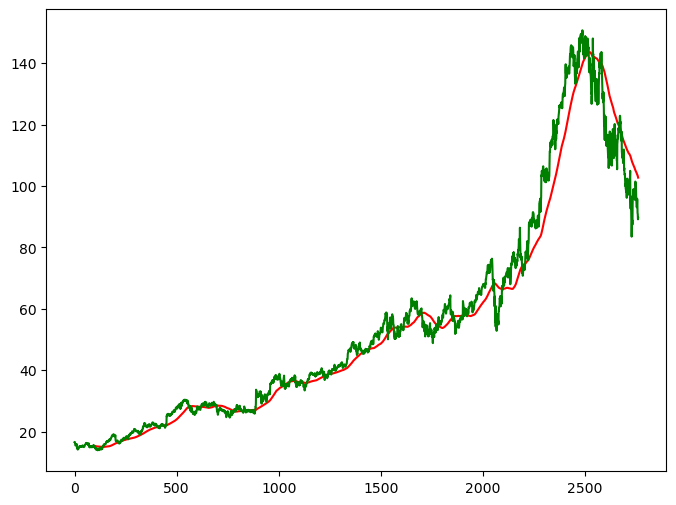

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

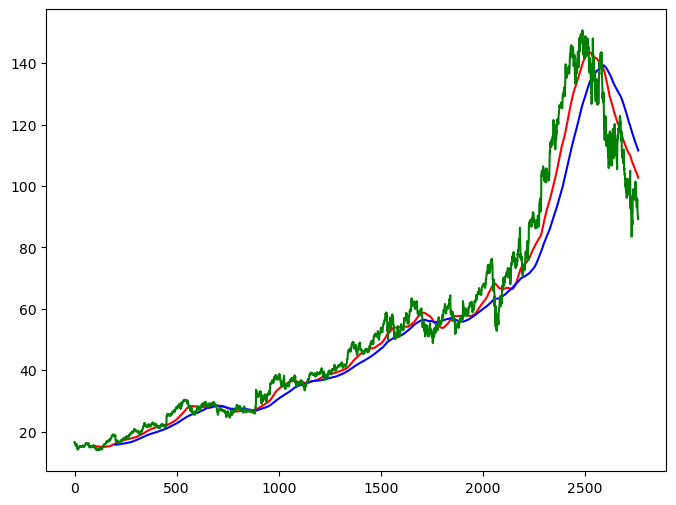

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [17]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [18]:
data_train.shape[0]

2208

In [19]:
data_test.shape[0]

553

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_train_scale = scaler.fit_transform(data_train)

In [22]:
x = []
y=[]

In [23]:
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i,0])

In [26]:
x, y = np.array(x), np.array(y)

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

2024-09-23 11:39:22.794169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [31]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
66/66 [==============================] - 36s 392ms/step - loss: 0.0347
Epoch 2/50
66/66 [==============================] - 25s 372ms/step - loss: 0.0064
Epoch 3/50
66/66 [==============================] - 24s 369ms/step - loss: 0.0057
Epoch 4/50
66/66 [==============================] - 30s 461ms/step - loss: 0.0058
Epoch 5/50
66/66 [==============================] - 28s 413ms/step - loss: 0.0049
Epoch 6/50
66/66 [==============================] - 15s 227ms/step - loss: 0.0044
Epoch 7/50
66/66 [==============================] - 15s 229ms/step - loss: 0.0048
Epoch 8/50
66/66 [==============================] - 14s 216ms/step - loss: 0.0049
Epoch 9/50
66/66 [==============================] - 14s 214ms/step - loss: 0.0041
Epoch 10/50
66/66 [==============================] - 15s 228ms/step - loss: 0.0043
Epoch 11/50
66/66 [==============================] - 15s 223ms/step - loss: 0.0038
Epoch 12/50
66/66 [==============================] - 15s 226ms/step - loss: 0.0037
Epoch 13/50
6

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
pas_100_days = data_train.tail(100)

In [34]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [36]:
data_test_scale = scaler.fit_transform(data_test)

In [38]:
x= []
y= []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x), np.array(y)

In [39]:
y_predict = model.predict(x)

18/18 [==============================] - 6s 147ms/step


In [44]:
scale = 1/scaler.scale_

In [45]:
y_predict = y_predict*scale

In [46]:
y = y*scale

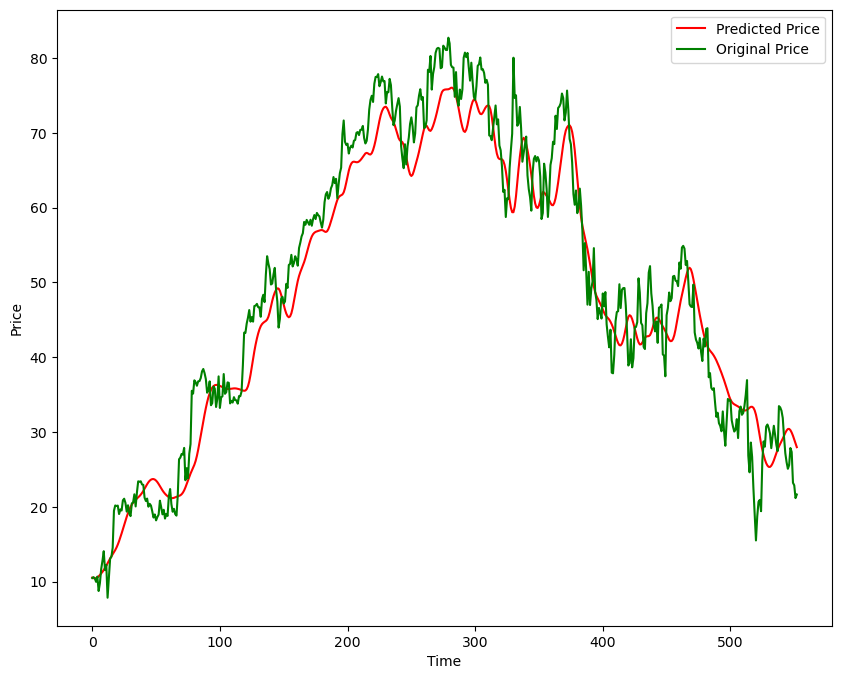

In [48]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label= 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
model.save('Stock Predictions Model.keras')